<a href="https://colab.research.google.com/github/gowri718/DS-Internship-/blob/main/Supermart_Grocery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermart Grocery Analysis - Retail Analysis Dataset**

### Importing libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
# Assuming your dataset is named "retail_sales.csv"
data = pd.read_csv('retail_sales.csv')

### Data Cleaning

In [ ]:
print(data['City'].unique())

['Vellore' 'Krishnagiri' 'Perambalur' 'Dharmapuri' 'Ooty' 'Trichy'
 'Ramanadhapuram' 'Tirunelveli' 'Chennai' 'Karur' 'Namakkal' 'Dindigul'
 'Kanyakumari' 'Bodi' 'Tenkasi' 'Viluppuram' 'Madurai' 'Salem' 'Cumbum'
 'Nagercoil' 'Pudukottai' 'Theni' 'Coimbatore' 'Virudhunagar']


In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Data Cleaning
# Check for missing values
print(data.isnull().sum())

# Fill missing values if necessary
# Example: Filling missing 'Discount' with 0, and 'Profit' with median value
data['Discount'].fillna(0, inplace=True)
data['Profit'].fillna(data['Profit'].median(), inplace=True)

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit

<ipython-input-3-829ef462dacc>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Discount'].fillna(0, inplace=True)
<ipython-input-3-829ef462dacc>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Data Overview: Summary statistics of numeric columns
print(data.describe())

# Total Sales and Profit Analysis
data['Total Sales'] = data['Sales'] - data['Discount']
data['Total Revenue'] = data['Sales']  # Assuming 'Sales' already represents total revenue
data['Profit Margin'] = data['Profit'] / data['Sales']

                          Order Date        Sales     Discount       Profit
count                           4042  9994.000000  9994.000000  9994.000000
mean   2017-04-28 03:16:17.931716864  1496.596158     0.226817   374.937082
min              2015-01-03 00:00:00   500.000000     0.100000    25.250000
25%              2016-05-09 06:00:00  1000.000000     0.160000   180.022500
50%              2017-07-01 00:00:00  1498.000000     0.230000   320.780000
75%              2018-06-01 00:00:00  1994.750000     0.290000   525.627500
max              2018-12-11 00:00:00  2500.000000     0.350000  1120.950000
std                              NaN   577.559036     0.074636   239.932881


### *Top 10 products by Total Revenue*

Sub Category
Health Drinks    1051439
Soft Drinks      1033874
Cookies           768213
Breads & Buns     742586
Noodles           735435
Chocolates        733898
Masalas           697480
Cakes             685612
Biscuits          684083
Spices            672876
Name: Total Revenue, dtype: int64


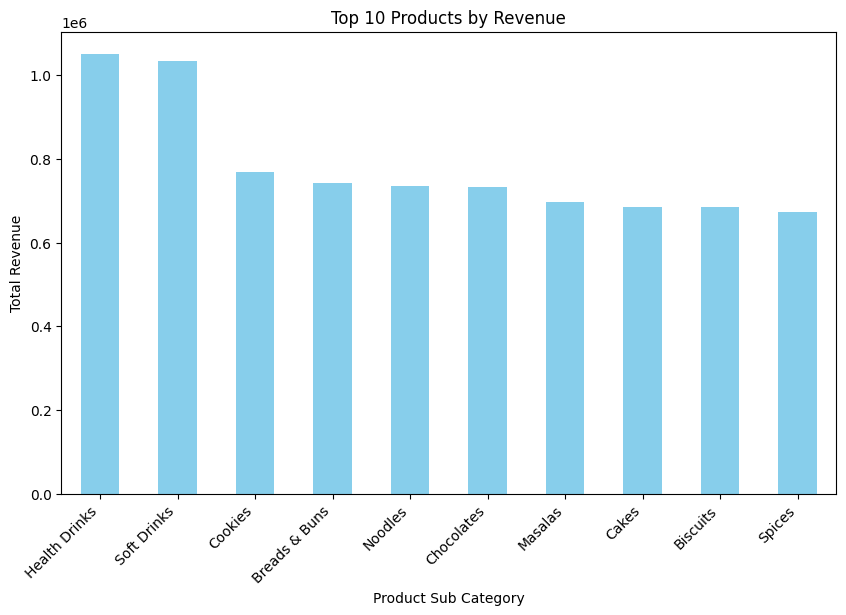

In [ ]:
# 1. Top 10 Products by Total Revenue (Sales)
top_10_products = data.groupby('Sub Category')['Total Revenue'].sum().nlargest(10)
print(top_10_products)

# Plotting the Top 10 Products by Revenue
top_10_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product Sub Category')
plt.xticks(rotation=45, ha='right')
plt.show()

### *Revenue by Category*

Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Total Revenue, dtype: int64


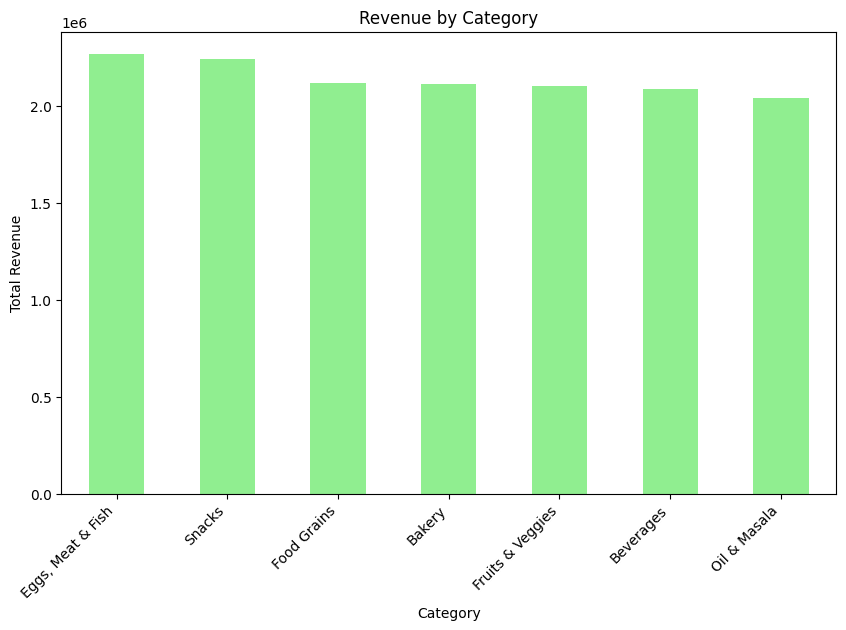

In [ ]:
# 2. Revenue by Category
category_revenue = data.groupby('Category')['Total Revenue'].sum().sort_values(ascending=False)
print(category_revenue)

# Plotting Revenue by Category
category_revenue.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Revenue by Category')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

### *Monthly Sales trend*

Month    1.0    2.0     3.0     4.0     5.0     6.0     7.0     8.0     9.0   \
Year                                                                           
2015.0  30730  38759   79758  110584   66499   85894   88365  123504  140160   
2016.0  46149  37291   76886   76011   78239   84632  109792   82885  147642   
2017.0  45331  55920  107658  119149  113912  130906   90521   63079  282087   
2018.0  53776  64904  106899  115698  132044  149021  123671   92101  315102   

Month     10.0    11.0    12.0  
Year                            
2015.0   82236  214650  139516  
2016.0  111016  166224  220203  
2017.0   84339  245991  272376  
2018.0  177805  306019  367566  


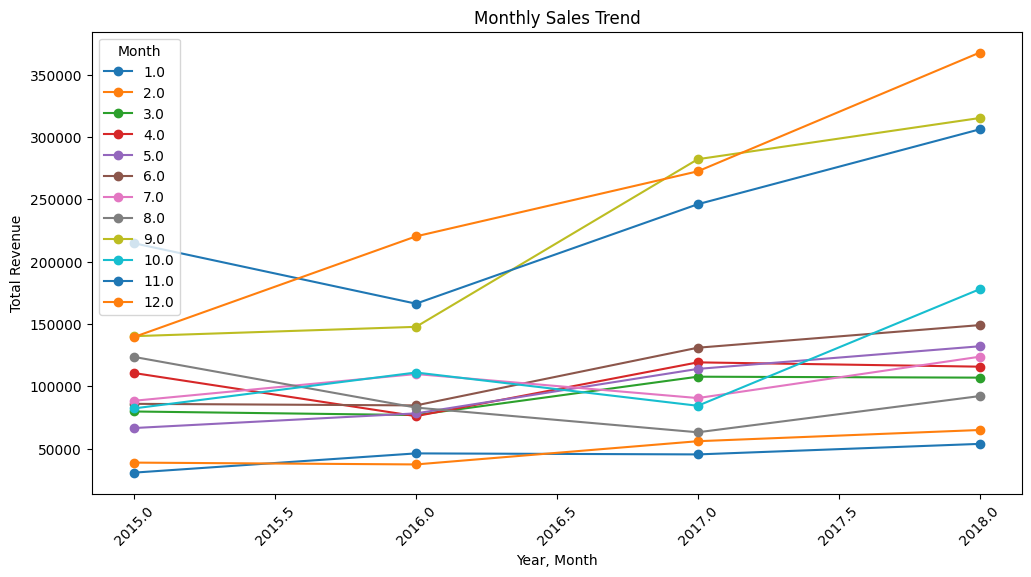

In [ ]:
# 3. Monthly Sales Trend
# Extract year and month from 'Order Date'
data['Year'] = pd.to_datetime(data['Order Date']).dt.year
data['Month'] = pd.to_datetime(data['Order Date']).dt.month

monthly_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack().fillna(0)
print(monthly_sales)

# Plotting Monthly Sales Trend
monthly_sales.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Year, Month')
plt.xticks(rotation=45)
plt.show()

### *Profit Analysis by Category*

Category
Snacks               568178.85
Eggs, Meat & Fish    567357.22
Fruits & Veggies     530400.38
Food Grains          529162.64
Bakery               528521.06
Beverages            525605.76
Oil & Masala         497895.29
Name: Profit, dtype: float64


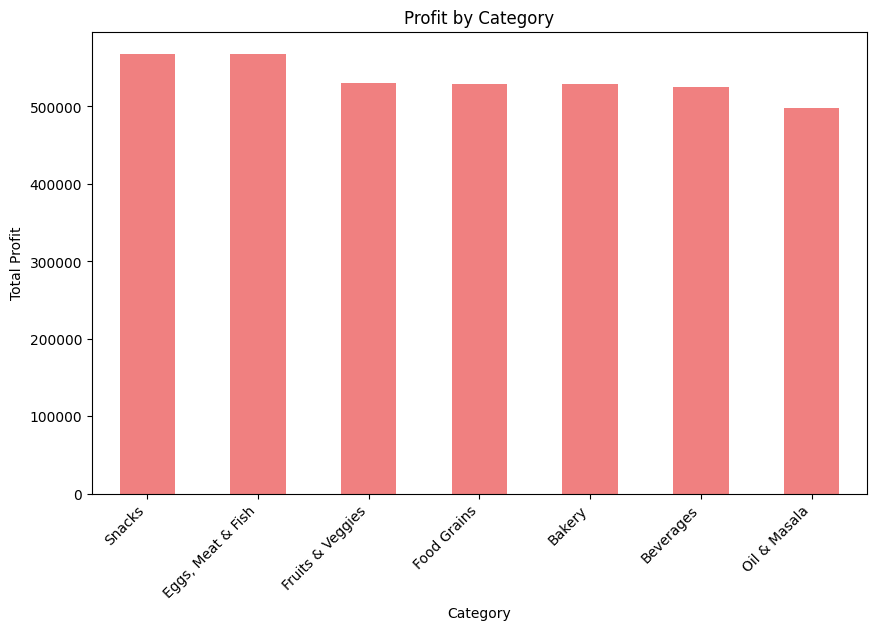

In [ ]:
# 4. Profit Analysis by Category
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(category_profit)

# Plotting Profit by Category
category_profit.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Profit by Category')
plt.ylabel('Total Profit')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

### *Discount Impact on Profit and Sales*

          Discount    Profit
Discount  1.000000  0.000017
Profit    0.000017  1.000000


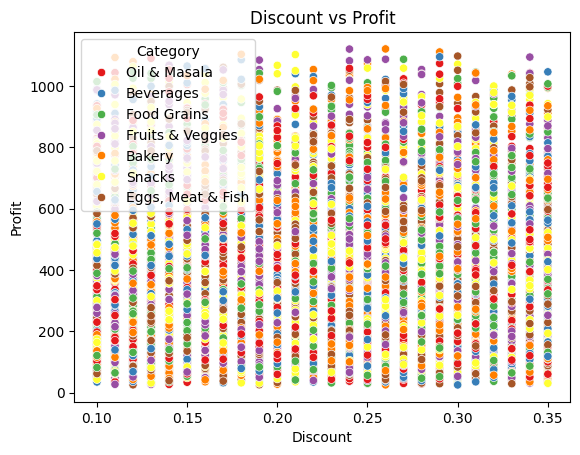

In [ ]:
# 5. Discount Impact on Profit and Sales
discount_profit_correlation = data[['Discount', 'Profit']].corr()
print(discount_profit_correlation)

# Plotting Discount vs Profit
sns.scatterplot(data=data, x='Discount', y='Profit', hue='Category', palette='Set1')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

### *Sales by Region*

Region
West       4798743
East       4248368
Central    3468156
South      2440461
North         1254
Name: Total Revenue, dtype: int64


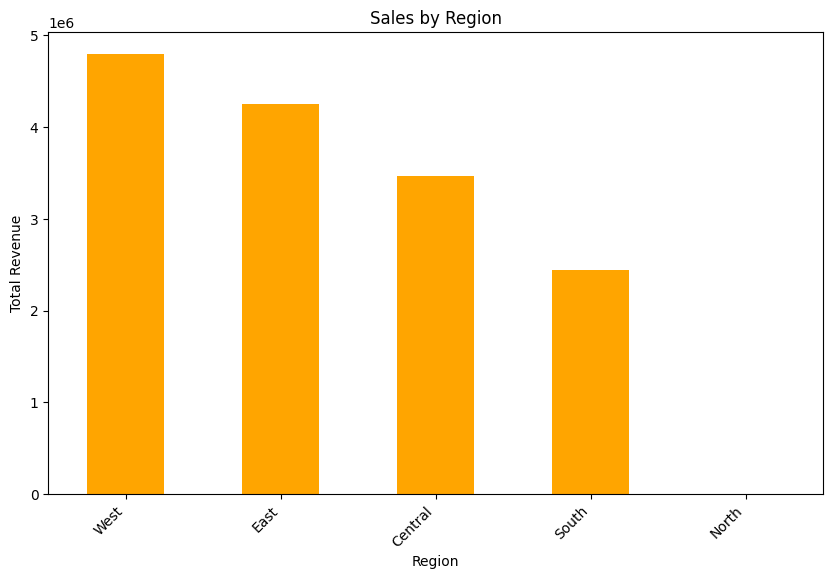

In [ ]:
# 6. Sales by Region
region_sales = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print(region_sales)

# Plotting Sales by Region
region_sales.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Sales by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.show()

### *Profit Margin by Sub Category*

Sub Category
Fish                  0.260000
Noodles               0.259657
Organic Staples       0.258790
Organic Vegetables    0.257205
Breads & Buns         0.256813
Organic Fruits        0.256034
Rice                  0.255061
Chocolates            0.253287
Health Drinks         0.252601
Fresh Vegetables      0.251045
Soft Drinks           0.250191
Edible Oil & Ghee     0.250044
Biscuits              0.248824
Eggs                  0.248285
Mutton                0.248046
Cookies               0.247827
Dals & Pulses         0.247784
Cakes                 0.246571
Fresh Fruits          0.245799
Masalas               0.243564
Chicken               0.239282
Spices                0.238322
Atta & Flour          0.237819
Name: Profit Margin, dtype: float64


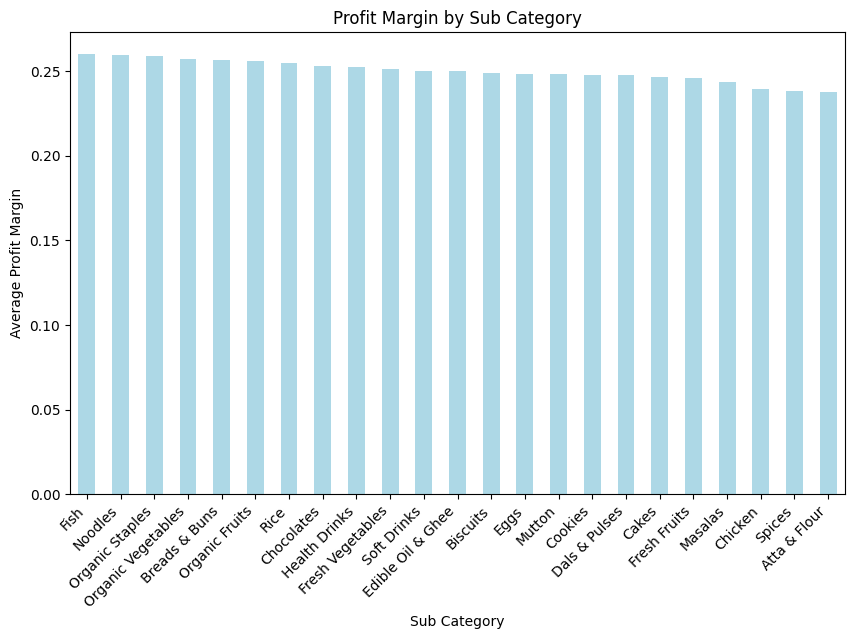

In [ ]:
# 7. Profit Margin by Sub Category
sub_category_profit_margin = data.groupby('Sub Category')['Profit Margin'].mean().sort_values(ascending=False)
print(sub_category_profit_margin)

# Plotting Profit Margin by Sub Category
sub_category_profit_margin.plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Profit Margin by Sub Category')
plt.ylabel('Average Profit Margin')
plt.xlabel('Sub Category')
plt.xticks(rotation=45, ha='right')
plt.show()

### *Sales by City*

City
Kanyakumari    706764
Vellore        676550
Bodi           667177
Tirunelveli    659812
Perambalur     659738
Salem          657093
Pudukottai     653179
Tenkasi        643652
Karur          642273
Krishnagiri    637273
Name: Total Revenue, dtype: int64


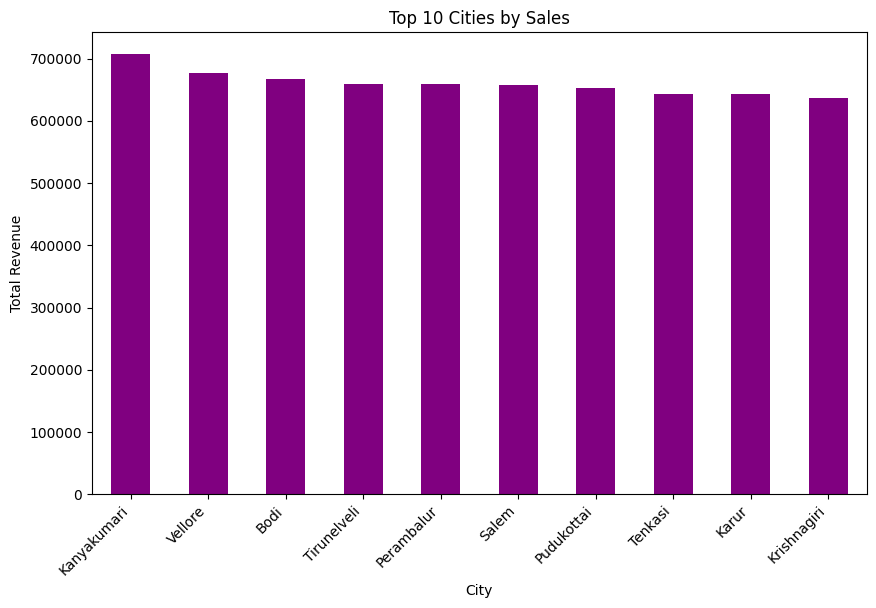

In [ ]:
# 8. Sales by City
city_sales = data.groupby('City')['Total Revenue'].sum().sort_values(ascending=False).head(10)
print(city_sales)

# Plotting Sales by Top 10 Cities
city_sales.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.show()